In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.datasets import mnist
from keras.utils import to_categorical

# 1. Tải và chuẩn bị dữ liệu
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Chuẩn hóa dữ liệu (scale pixel về khoảng [0,1])
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Thêm kênh màu (grayscale nên có 1 kênh)
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# One-hot encode cho nhãn (số 0–9)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 2. Xây dựng mô hình CNN
model = Sequential()
model.add(Conv2D(25, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))  # thêm lớp ẩn fully connected
model.add(Dense(10, activation='softmax'))  # lớp đầu ra cho 10 chữ số

# 3. Compile mô hình
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 4. Huấn luyện mô hình
model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)

# 5. Đánh giá trên tập test
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 24s 52ms/step - accuracy: 0.8682 - loss: 0.4680 - val_accuracy: 0.9800 - val_loss: 0.0799
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 54ms/step - accuracy: 0.9744 - loss: 0.0878 - val_accuracy: 0.9820 - val_loss: 0.0605
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 55ms/step - accuracy: 0.9849 - loss: 0.0504 - val_accuracy: 0.9845 - val_loss: 0.0541
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.9887 - loss: 0.0371 - val_accuracy: 0.9867 - val_loss: 0.0514
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 51ms/step - accuracy: 0.9921 - loss: 0.0275 - val_accuracy: 0.9860 - val_loss: 0.0487
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9815 - loss: 0.0574
Test accuracy: 0.9850


Epoch 1/2
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 56ms/step - accuracy: 0.8585 - loss: 0.5069 - val_accuracy: 0.9772 - val_loss: 0.0868
Epoch 2/2
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 55ms/step - accuracy: 0.9762 - loss: 0.0832 - val_accuracy: 0.9807 - val_loss: 0.0655
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


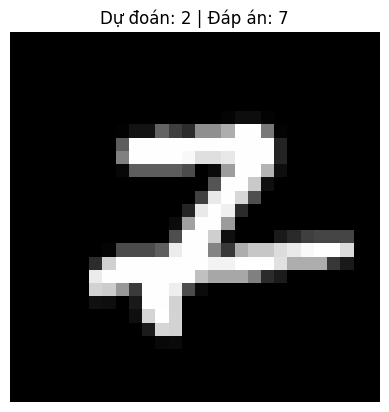

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.datasets import mnist
from keras.utils import to_categorical

# 1. Tải và xử lý dữ liệu
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# 2. Xây mô hình CNN
model = Sequential()
model.add(Conv2D(25, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 3. Compile và train mô hình (ngắn gọn để demo)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train_cat, epochs=2, batch_size=128, validation_split=0.1)

# 4. Chọn ảnh ngẫu nhiên từ tập test
index = random.randint(0, len(x_test) - 1)
random_image = x_test[index]
true_label = y_test[index]

# 5. Dự đoán
prediction = model.predict(np.expand_dims(random_image, axis=0))
predicted_label = np.argmax(prediction)

# 6. Hiển thị ảnh và kết quả dự đoán
plt.imshow(random_image.squeeze(), cmap='gray')
plt.title(f'Dự đoán: {predicted_label} | Đáp án: {true_label}')
plt.axis('off')
plt.show()
